Import the libraries that we will  use

In [16]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

Transform images to same size

In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [18]:
trainset = datasets.MNIST(r'..\input\MNIST', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST(r'..\input\MNIST', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [19]:
dataiter = iter(trainloader) # creating a iterator
images, labels = dataiter.next() # creating images for image and lables for image number (0 to 9) 

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


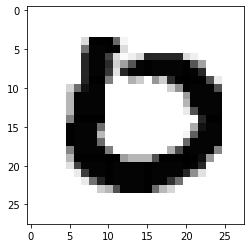

In [20]:
plt.imshow(images[5].numpy().squeeze(), cmap='gray_r');

In [21]:
# Model creation with neural net Sequential model
model=nn.Sequential(nn.Linear(784,128), # 1 layer:- 784 input 128 o/p
                    nn.ReLU(),          # Defining Regular linear unit as activation
                    nn.Linear(128,64),  # 2 Layer:- 128 Input and 64 O/p
                    nn.Tanh(),          # Defining Regular linear unit as activation
                    nn.Linear(64,10),   # 3 Layer:- 64 Input and 10 O/P as (0-9)
                    nn.LogSoftmax(dim=1) # Defining the log softmax to find the probablities for the last output unit
                  ) 

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): Tanh()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [22]:
# defining the negative log-likelihood loss for calculating loss
criterion = nn.NLLLoss() 

In [23]:
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL-loss

In [24]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward() # to calculate gradients of parameter 
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0044, -0.0044, -0.0044,  ..., -0.0044, -0.0044, -0.0044],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        [-0.0026, -0.0026, -0.0026,  ..., -0.0026, -0.0026, -0.0026]])


In [25]:
# defining the optimiser with stochastic gradient descent and default parameters
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass
output = model(images)
loss = criterion(output, labels)
# the backward pass and update weights
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0340, -0.0104, -0.0306,  ..., -0.0128, -0.0208,  0.0045],
        [ 0.0204, -0.0087, -0.0150,  ...,  0.0342,  0.0189,  0.0209],
        [-0.0319,  0.0195, -0.0091,  ..., -0.0265, -0.0153,  0.0333],
        ...,
        [ 0.0225, -0.0332, -0.0085,  ..., -0.0042,  0.0178,  0.0223],
        [-0.0129, -0.0062, -0.0103,  ..., -0.0035, -0.0353, -0.0164],
        [ 0.0154, -0.0333, -0.0318,  ..., -0.0305, -0.0006, -0.0257]],
       requires_grad=True)
Gradient - tensor([[ 0.0019,  0.0019,  0.0019,  ...,  0.0019,  0.0019,  0.0019],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021]])


In [26]:
time0 = time()
epochs = 15 # total number of iteration for training
running_loss_list= []
epochs_list = []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatenning MNIST images with size [64,784]
        images = images.view(images.shape[0], -1) 
    
        # defining gradient in each epoch as 0
        optimizer.zero_grad()
        
        # modeling for each image batch
        output = model(images)
        
        # calculating the loss
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        # calculating the loss
        running_loss += loss.item()
        
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.41845762318989105
Epoch 1 - Training loss: 0.17543889603404794
Epoch 2 - Training loss: 0.12863426118977925
Epoch 3 - Training loss: 0.10165764263688104
Epoch 4 - Training loss: 0.0840771863582546
Epoch 5 - Training loss: 0.0723318711912601
Epoch 6 - Training loss: 0.06433894395131244
Epoch 7 - Training loss: 0.056032846718013826
Epoch 8 - Training loss: 0.04972493586821486
Epoch 9 - Training loss: 0.04468445632972125
Epoch 10 - Training loss: 0.03915701295124557
Epoch 11 - Training loss: 0.03365506702900749
Epoch 12 - Training loss: 0.03171835527536886
Epoch 13 - Training loss: 0.026937037673237713
Epoch 14 - Training loss: 0.02575969563638007

Training Time (in minutes) = 2.4917484005292256


In [27]:
def classify(img, ps):
    ''' 
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 8


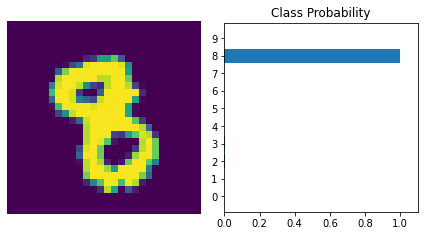

In [28]:
images, labels = next(iter(testloader))
# replace trainloader to check training accuracy.

img = images[7].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logpb = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
pb = torch.exp(logpb)
probab = list(pb.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
classify(img.view(1, 28, 28), pb)

In [29]:
correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)

    with torch.no_grad():
        logps = model(img)

    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9732
